In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



In [3]:
num_robot = 24
fieldsPerKilobot = 6
experiment_time = 1800
num_run = 100

num_areas = 16
fieldsPerArea = 6 #id, posx, posy, color, completed?, #kilo_in_area

In [4]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

In [5]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/persistent/Mixed'

results_folders = ['/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/brownian/Regions']
results_folders += ['/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/persistent/Regions']
results_folders += ['/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptive/Regions']

results_folders += ['/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/brownian/Mixed']
results_folders += ['/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/persistent/Mixed']
results_folders += ['/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptive/Mixed']

In [6]:
#WARNING: be carefull if in the entire run no red/blue area is completed        

step = 50
bin_edges = np.arange(0,1800+step,step)

cumsums = {}

for results_folder in results_folders:
    
    cumsum_red = np.array([])
    cumsum_blue = np.array([])
    
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
        timeout = -1
        print(colored("Timeout folder:", 'blue'),timeout_folder)

        parameters = timeout_folder.split("_")

#         print("parameters:",parameters)
        for param in parameters:
            if param.startswith("timeout"):
    #             print(param.split("#")[-1])
                timeout = int(param.split("#")[-1]) * 10
                print("\ttimeout:",timeout)

    #     if timeout == 20 :
    #         break

        if timeout == -1 :
            print(colored("\tWARNING: wrong timeout folder", 'green'))
            continue

        exp_config = parameters[0]+"_"+parameters[1]+"_"+str(timeout)
        cumsums[exp_config] = {}
        print("Exp configuration:",exp_config)
        
        for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
            if filename.endswith("completed_taskLOG.tsv"):
                if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
#                 print('\tfilename: ', filename)

                df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
                df_completedTask.columns = completed_task_label


                df_blue = df_completedTask.where(df_completedTask['type'] == 0)
                filtered_blue = df_blue[df_blue['time'].notnull()]

                df_red = df_completedTask.mask(df_completedTask['type'] == 0)
                filtered_red = df_red[df_red['time'].notnull()]

                hist_red,_= np.histogram(filtered_red['time'].values,bin_edges)
                hist_blue,_= np.histogram(filtered_blue['time'].values,bin_edges)

#                 print("hist_red:\n",hist_red)
#                 print("hist_blue:\n",hist_blue)

                cumsum_blue = np.vstack([cumsum_blue, hist_blue.cumsum()]) if cumsum_blue.size else hist_blue.cumsum()
                cumsum_red = np.vstack([cumsum_red, hist_red.cumsum()]) if cumsum_red.size else hist_red.cumsum()

#                 print("cumsum_red:\n",cumsum_red)
#                 print("cumsum_blue:\n",cumsum_blue)

        cumsums[exp_config] = {"blue":[np.mean(cumsum_blue, axis=0),np.std(cumsum_blue, axis=0)],"red":[np.mean(cumsum_red, axis=0),np.std(cumsum_red, axis=0)]}
#         break


Timeout folder: Regions_Brownian_2021-07-13_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
Exp configuration: Regions_Brownian_10
Timeout folder: Regions_Brownian_2021-07-13_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 30
Exp configuration: Regions_Brownian_30
Timeout folder: Regions_Brownian_2021-07-13_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 60
Exp configuration: Regions_Brownian_60
Timeout folder: Regions_Brownian_2021-07-13_robots#24_timeout#12_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 120
Exp configuration: Regions_Brownian_120
Timeout folder: Regions_Brownian_2021-07-13_robots#24_timeout#18_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 180
Exp configuration: Regions_Brownian_180
Timeout folder: Regions_Brownian_2021-07-13_robots#24_timeout#24_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 240
Exp configuration: Regions_Brownian_240
Timeout folde

Timeout folder: Mixed_Brownian_2021-07-13_robots#24_timeout#60_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 600
Exp configuration: Mixed_Brownian_600
Timeout folder: Mixed_Persistent_2021-07-14_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
Exp configuration: Mixed_Persistent_10
Timeout folder: Mixed_Persistent_2021-07-14_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 30
Exp configuration: Mixed_Persistent_30
Timeout folder: Mixed_Persistent_2021-07-14_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 60
Exp configuration: Mixed_Persistent_60
Timeout folder: Mixed_Persistent_2021-07-14_robots#24_timeout#12_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 120
Exp configuration: Mixed_Persistent_120
Timeout folder: Mixed_Persistent_2021-07-14_robots#24_timeout#18_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 180
Exp configuration: Mixed_Persistent_180
Timeout folder: M

In [7]:
# for key,value in cumsums.items():
#     print(key)
#     for nested_key, nested_val in value.items():
#         print(nested_key, nested_val[0].size, nested_val[1].size)
        

In [14]:
def cumulative_plot(cumsums, bin_edges, timeout):

    plt.rcParams.update({'font.size': 14})
    
    region_persistent_blue_mean = np.append([0],cumsums["Regions_Persistent_" + timeout]["blue"][0])
    region_persistent_blue_std = np.append([0],cumsums["Regions_Persistent_" + timeout]["blue"][1])
    region_persistent_red_mean = np.append([0],cumsums["Regions_Persistent_" + timeout]["red"][0])
    region_persistent_red_std = np.append([0],cumsums["Regions_Persistent_" + timeout]["red"][1])

    mixed_persistent_blue_mean = np.append([0],cumsums["Mixed_Persistent_" + timeout]["blue"][0])
    mixed_persistent_blue_std = np.append([0],cumsums["Mixed_Persistent_" + timeout]["blue"][1])
    mixed_persistent_red_mean = np.append([0],cumsums["Mixed_Persistent_" + timeout]["red"][0])
    mixed_persistent_red_std = np.append([0],cumsums["Mixed_Persistent_" + timeout]["red"][1])


    region_brownian_blue_mean = np.append([0],cumsums["Regions_Brownian_" + timeout]["blue"][0])
    region_brownian_blue_std = np.append([0],cumsums["Regions_Brownian_" + timeout]["blue"][1])
    region_brownian_red_mean = np.append([0],cumsums["Regions_Brownian_" + timeout]["red"][0])
    region_brownian_red_std = np.append([0],cumsums["Regions_Brownian_" + timeout]["red"][1])

    mixed_brownian_blue_mean = np.append([0],cumsums["Mixed_Brownian_" + timeout]["blue"][0])
    mixed_brownian_blue_std = np.append([0],cumsums["Mixed_Brownian_" + timeout]["blue"][1])
    mixed_brownian_red_mean = np.append([0],cumsums["Mixed_Brownian_" + timeout]["red"][0])
    mixed_brownian_red_std = np.append([0],cumsums["Mixed_Brownian_" + timeout]["red"][1])


    region_adaptive_blue_mean = np.append([0],cumsums["Regions_AdaptiveWalk_" + timeout]["blue"][0])
    region_adaptive_blue_std = np.append([0],cumsums["Regions_AdaptiveWalk_" + timeout]["blue"][1])
    region_adaptive_red_mean = np.append([0],cumsums["Regions_AdaptiveWalk_" + timeout]["red"][0])
    region_adaptive_red_std = np.append([0],cumsums["Regions_AdaptiveWalk_" + timeout]["red"][1])

    mixed_adaptive_blue_mean = np.append([0],cumsums["Mixed_AdaptiveWalk_" + timeout]["blue"][0])
    mixed_adaptive_blue_std = np.append([0],cumsums["Mixed_AdaptiveWalk_" + timeout]["blue"][1])
    mixed_adaptive_red_mean = np.append([0],cumsums["Mixed_AdaptiveWalk_" + timeout]["red"][0])
    mixed_adaptive_red_std = np.append([0],cumsums["Mixed_AdaptiveWalk_" + timeout]["red"][1])



    fig, ax = plt.subplots(figsize=(25, 10), dpi=80)

    ax.plot(bin_edges, region_persistent_blue_mean, 'r-o', linewidth=1.5, label='Regions_Persistent_soft_task')
    ax.fill_between(bin_edges, region_persistent_blue_mean - region_persistent_blue_std, region_persistent_blue_mean + region_persistent_blue_std, alpha=0.2, color="r")
    ax.plot(bin_edges, region_persistent_red_mean, 'r--s', linewidth=1.5, label='Regions_Persistent_hard_task')
    ax.fill_between(bin_edges, region_persistent_red_mean - region_persistent_red_std, region_persistent_red_mean + region_persistent_red_std, alpha=0.2, color="r")

    ax.plot(bin_edges, region_brownian_blue_mean, 'b-o', linewidth=1.5, label='Regions_Brownian_soft_task')
    ax.fill_between(bin_edges, region_brownian_blue_mean - region_brownian_blue_std, region_brownian_blue_mean + region_brownian_blue_std, alpha=0.2, color="b")
    ax.plot(bin_edges, region_brownian_red_mean, 'b--s', linewidth=1.5, label='Regions_Brownian_hard_task')
    ax.fill_between(bin_edges, region_brownian_red_mean - region_brownian_red_std, region_brownian_red_mean + region_brownian_red_std, alpha=0.2, color="b")

    ax.plot(bin_edges, region_adaptive_blue_mean, 'g-o', linewidth=1.5, label='Regions_Adaptive_soft_task')
    ax.fill_between(bin_edges, region_adaptive_blue_mean - region_adaptive_blue_std, region_adaptive_blue_mean + region_adaptive_blue_std, alpha=0.2, color="g")
    ax.plot(bin_edges, region_adaptive_red_mean, 'g--s', linewidth=1.5, label='Regions_Adaptive_hard_task')
    ax.fill_between(bin_edges, region_adaptive_red_mean - region_adaptive_red_std, region_adaptive_red_mean + region_adaptive_red_std, alpha=0.2, color="g")

    # tidy up the figure
    ax.set_xticks(bin_edges)
    ax.set_xticklabels(bin_edges*10**-2)
    ax.grid(True)
    ax.legend(loc='upper left')
    ax.set_title('Cumulative area completion, timeout: ' + r"$\bf{" + timeout + "}$")
    ax.set_xlabel('Time $10^{-2}$ [s]')
    ax.set_ylabel('Cumulative area completion')
    ax.set_ylim(top=130)
    figName="cumulativeAreaCompletion_Regions_timeout#"+timeout+".png"
    print("Saving figure: ", figName)
    plt.savefig(figName)
    plt.show()
    
    
    
    
    fig, ax = plt.subplots(figsize=(25, 10), dpi=80)
    
    ax.plot(bin_edges, mixed_persistent_blue_mean, 'r-o', linewidth=1.5, label='Mixed_Persistent_soft_task')
    ax.fill_between(bin_edges, mixed_persistent_blue_mean - mixed_persistent_blue_std, mixed_persistent_blue_mean + mixed_persistent_blue_std, alpha=0.2, color="r")
    ax.plot(bin_edges, mixed_persistent_red_mean, 'r--s', linewidth=1.5, label='Mixed_Persistent_hard_task')
    ax.fill_between(bin_edges, mixed_persistent_red_mean - mixed_persistent_red_std, mixed_persistent_red_mean + mixed_persistent_red_std, alpha=0.2, color="r")

    ax.plot(bin_edges, mixed_brownian_blue_mean, 'b-o', linewidth=1.5, label='Mixed_Brownian_soft_task')
    ax.fill_between(bin_edges, mixed_brownian_blue_mean - mixed_brownian_blue_std, mixed_brownian_blue_mean + mixed_brownian_blue_std, alpha=0.2, color="b")
    ax.plot(bin_edges, mixed_brownian_red_mean, 'b--s', linewidth=1.5, label='Mixed_Brownian_hard_task')
    ax.fill_between(bin_edges, mixed_brownian_red_mean - mixed_brownian_red_std, mixed_brownian_red_mean + mixed_brownian_red_std, alpha=0.2, color="b")

    ax.plot(bin_edges, mixed_adaptive_blue_mean, 'g-o', linewidth=1.5, label='Mixed_Adaptive_soft_task')
    ax.fill_between(bin_edges, mixed_adaptive_blue_mean - mixed_adaptive_blue_std, mixed_adaptive_blue_mean + mixed_adaptive_blue_std, alpha=0.2, color="g")
    ax.plot(bin_edges, mixed_adaptive_red_mean, 'g--s', linewidth=1.5, label='Mixed_Adaptive_hard_task')
    ax.fill_between(bin_edges, mixed_adaptive_red_mean - mixed_adaptive_red_std, mixed_adaptive_red_mean + mixed_adaptive_red_std, alpha=0.2, color="g")
    
    # tidy up the figure
    ax.set_xticks(bin_edges)
    ax.set_xticklabels(bin_edges*10**-2)
    ax.grid(True)
    ax.legend(loc='upper left')
    ax.set_title('Cumulative area completion, timeout: ' + r"$\bf{" + timeout + "}$")
    ax.set_xlabel('Time $10^{-2}$ [s]')
    ax.set_ylabel('Cumulative area completion')
    ax.set_ylim(top=130)
    figName="cumulativeAreaCompletion_Mixed_timeout#"+timeout+".png"
    print("Saving figure: ", figName)
    plt.savefig(figName)
    plt.show()


In [15]:
# cumulative_plot(cumsums, bin_edges, "240")

Saving figure:  cumulativeAreaCompletion_Regions_timeout#10.png


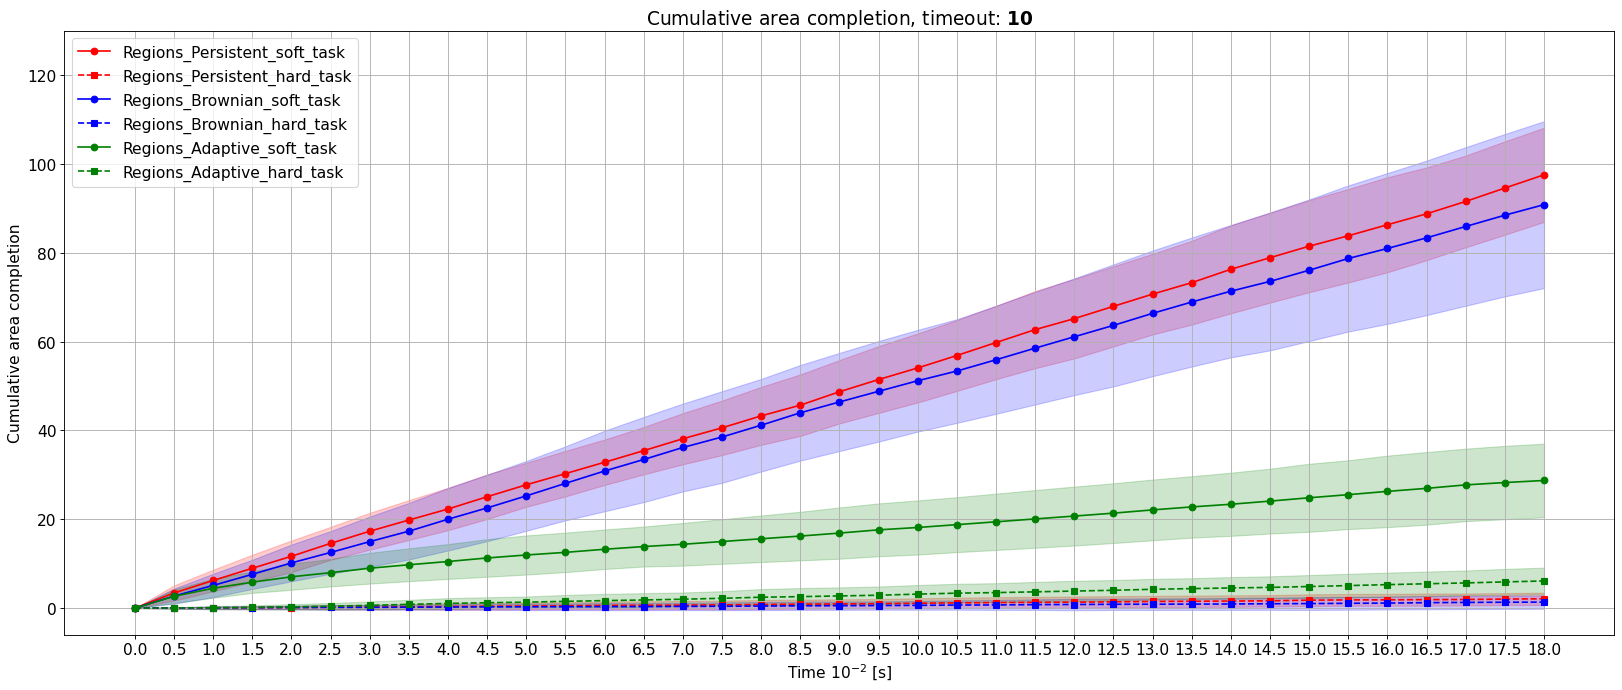

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#10.png


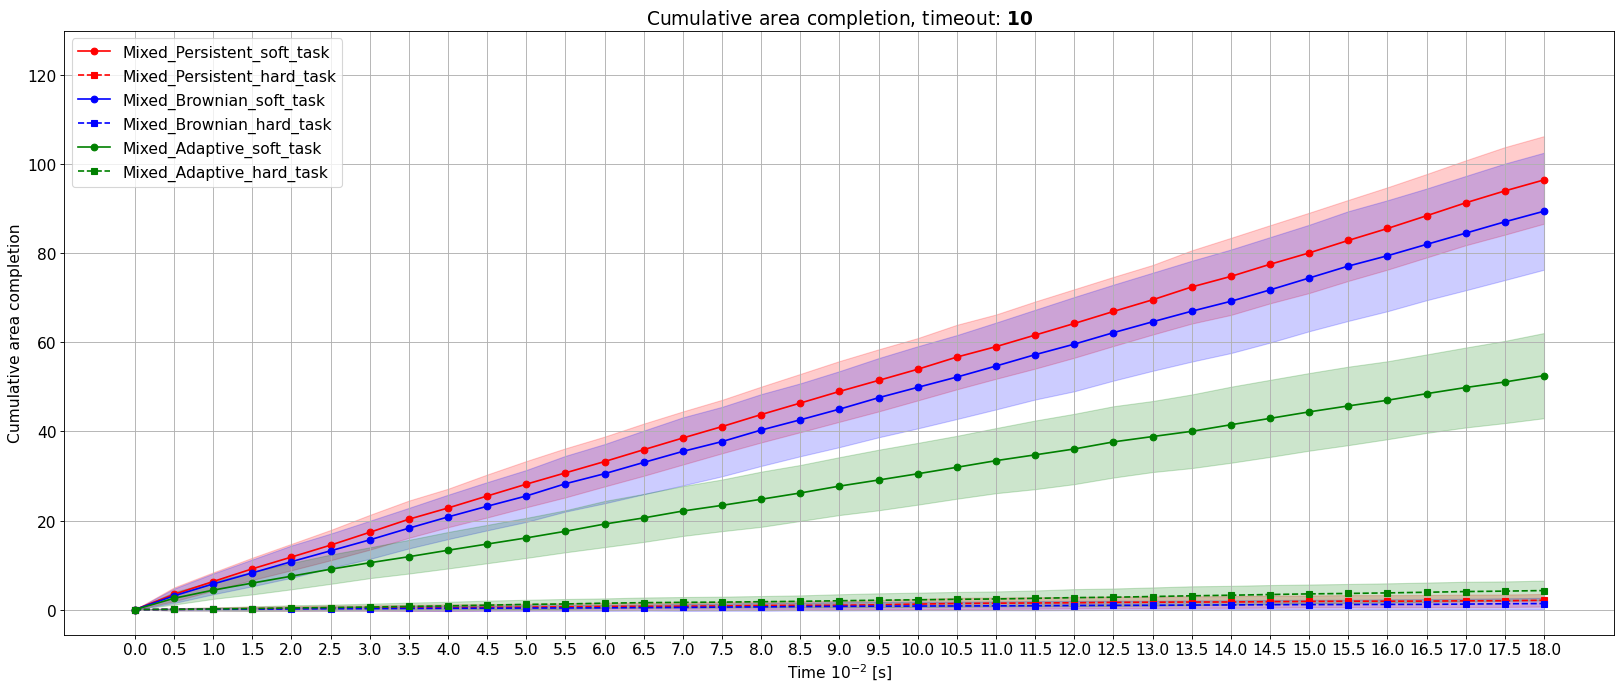

Saving figure:  cumulativeAreaCompletion_Regions_timeout#30.png


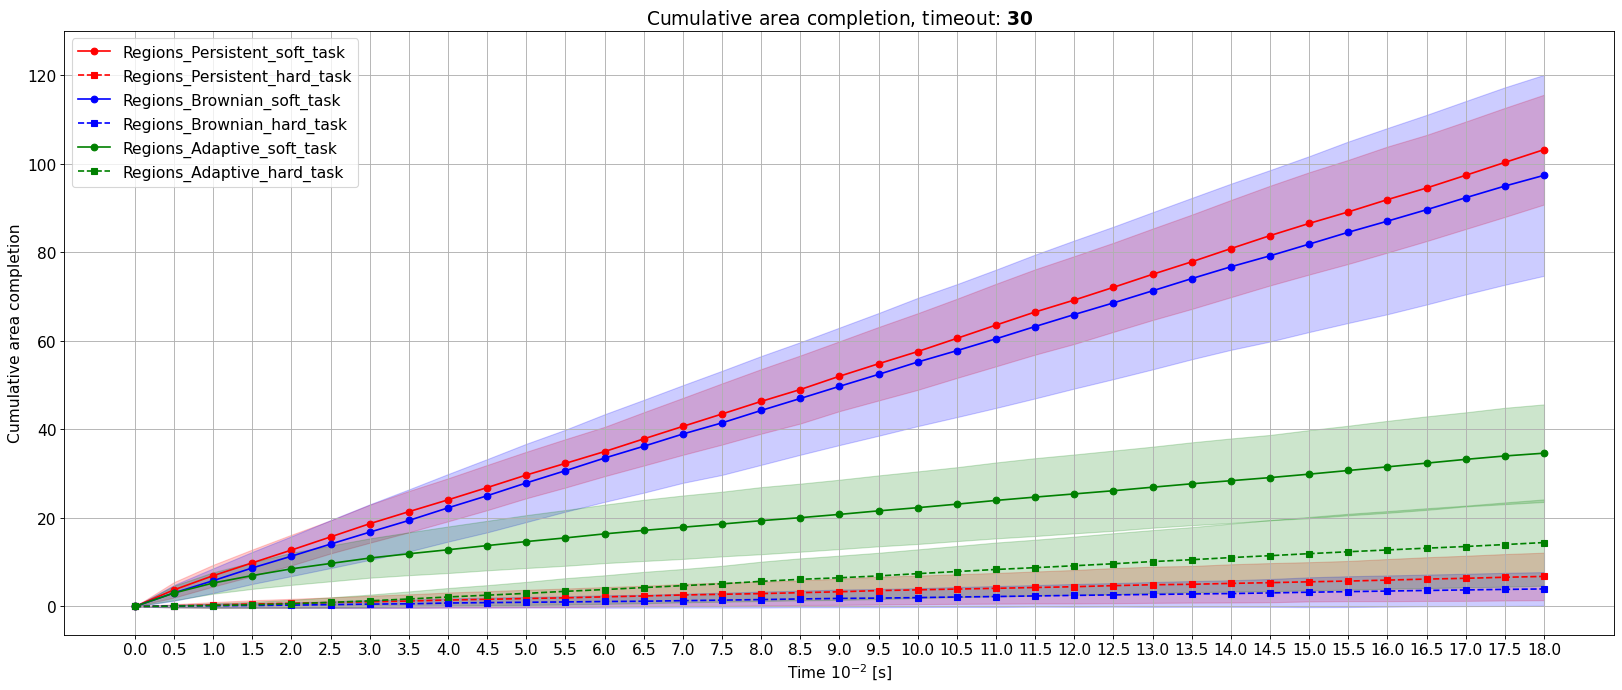

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#30.png


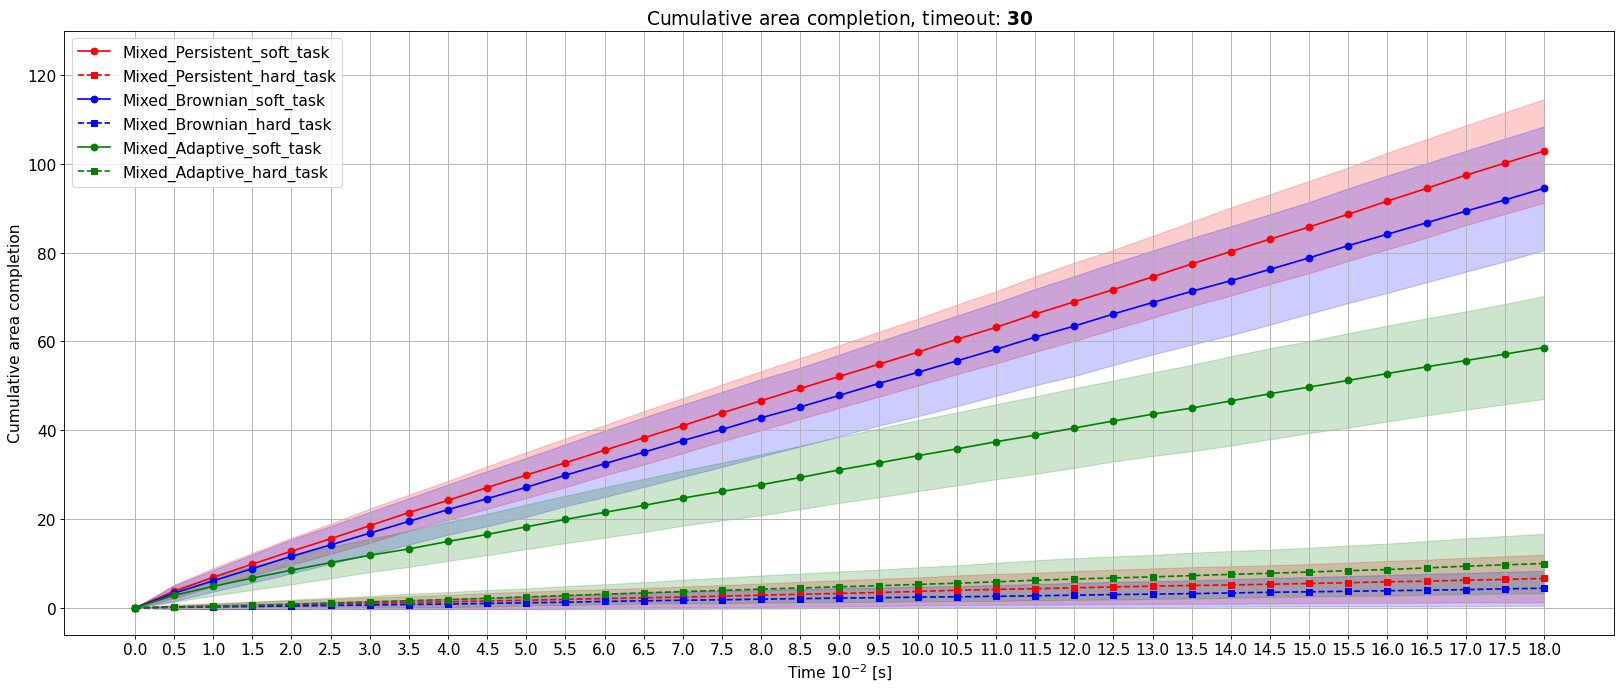

Saving figure:  cumulativeAreaCompletion_Regions_timeout#60.png


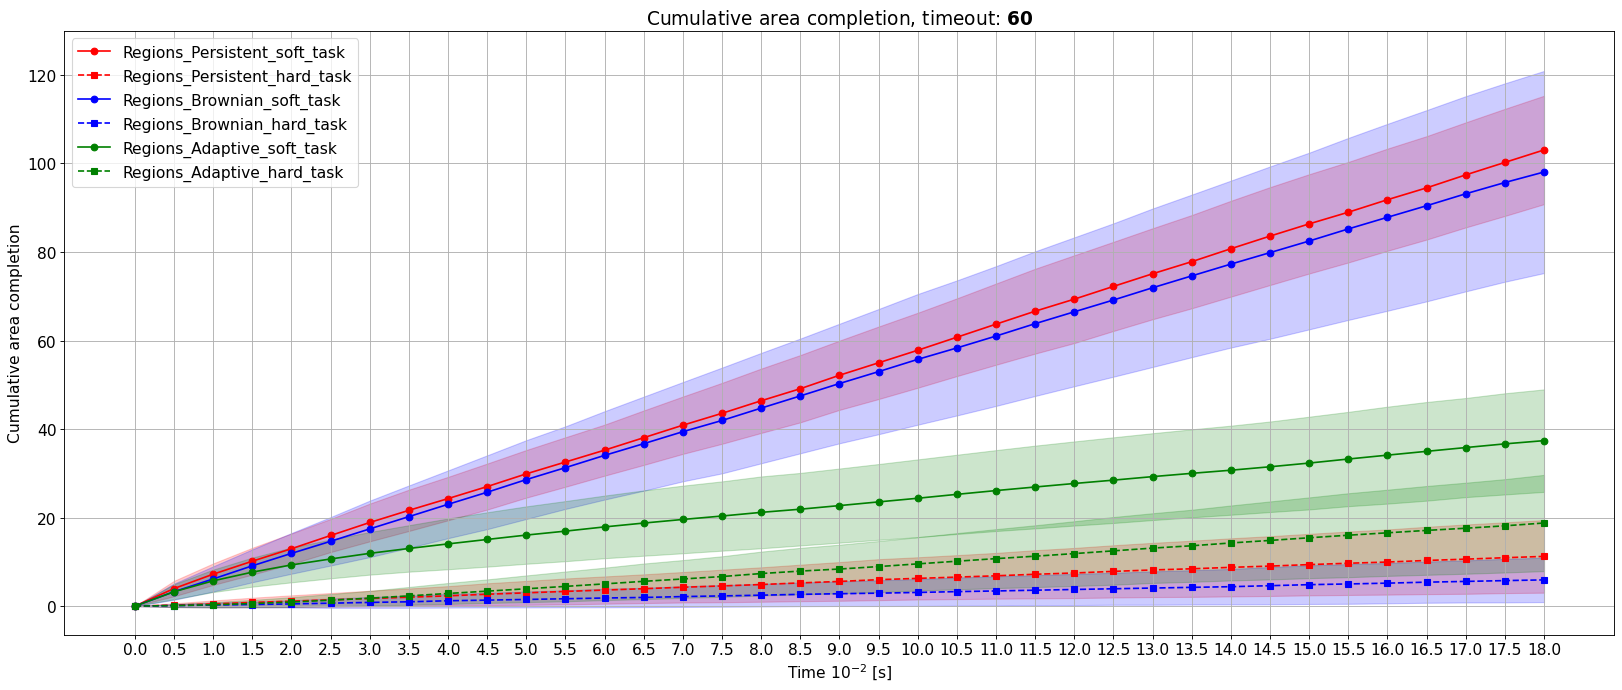

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#60.png


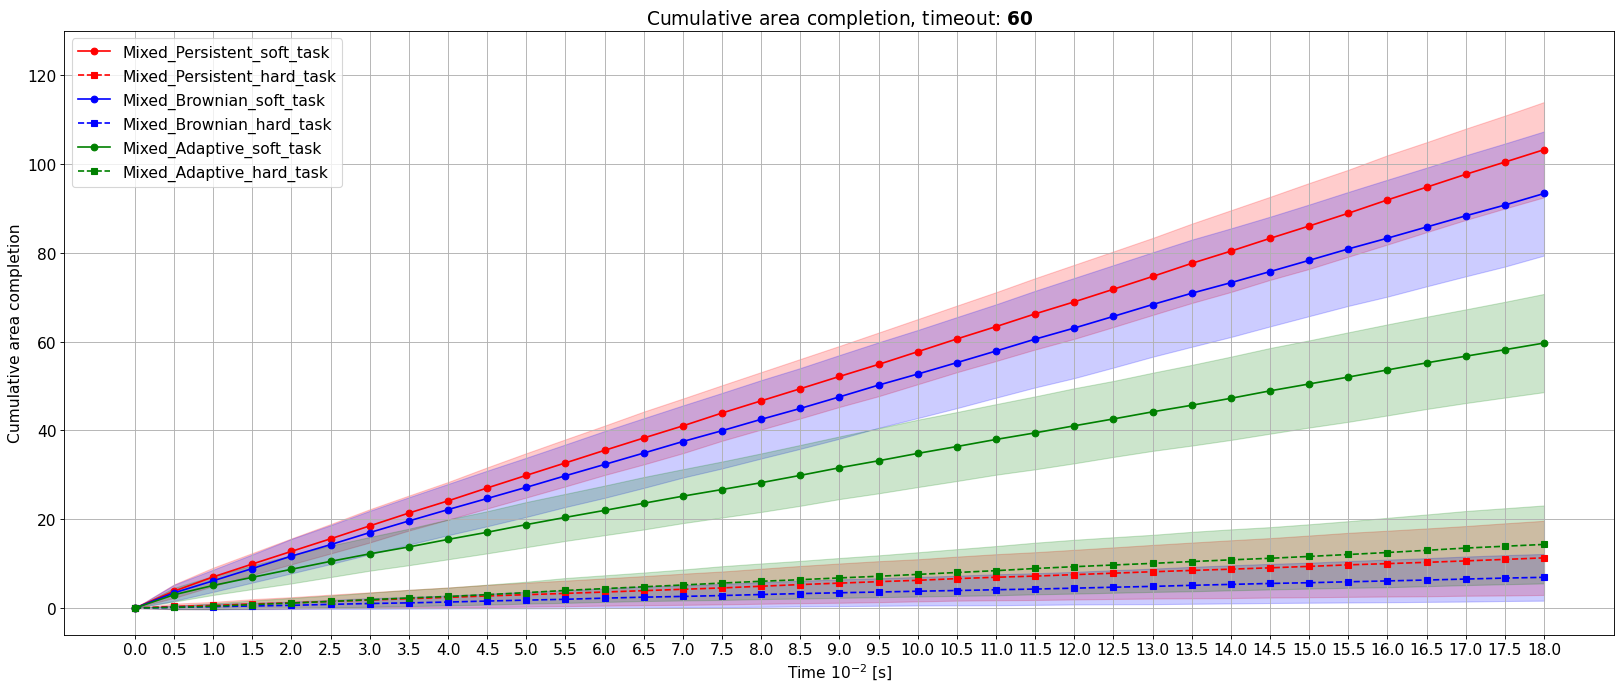

Saving figure:  cumulativeAreaCompletion_Regions_timeout#120.png


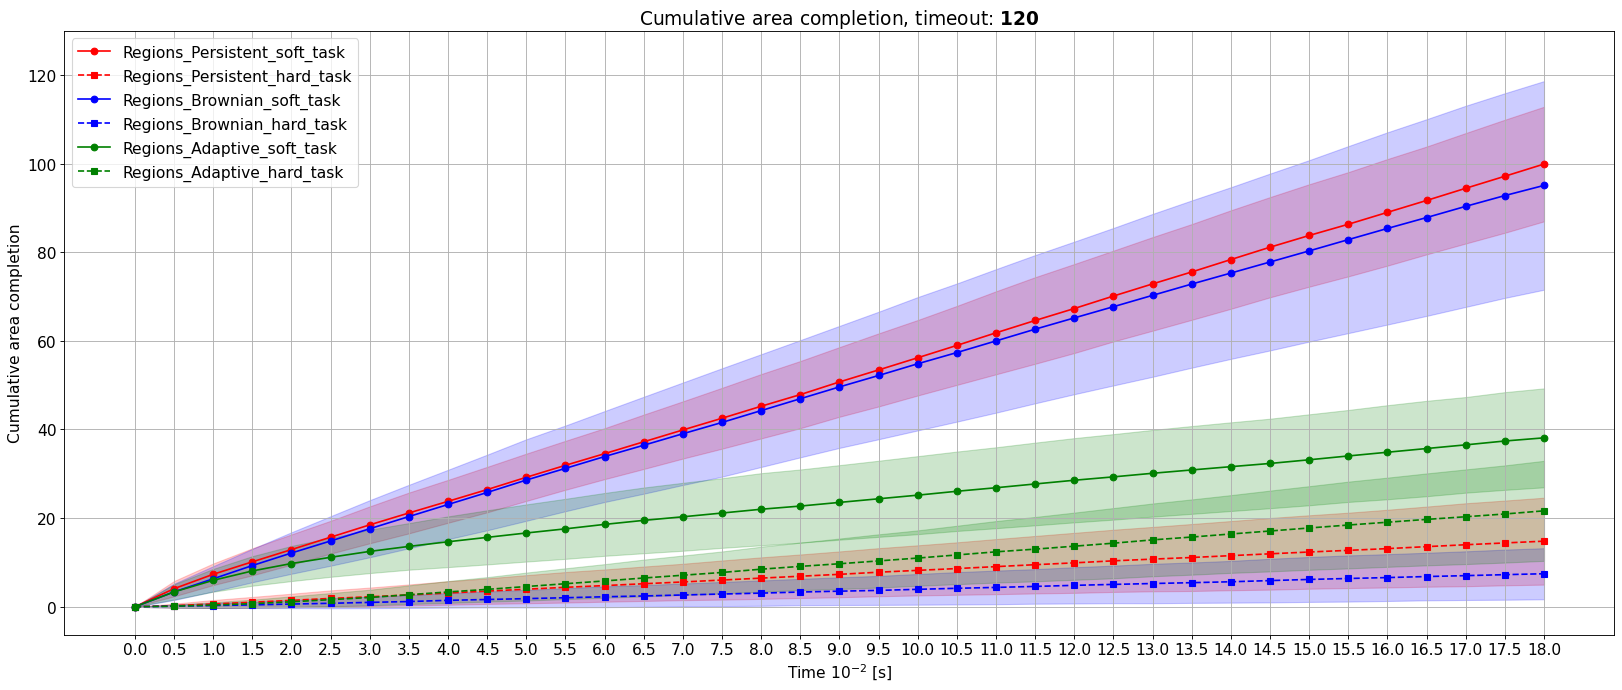

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#120.png


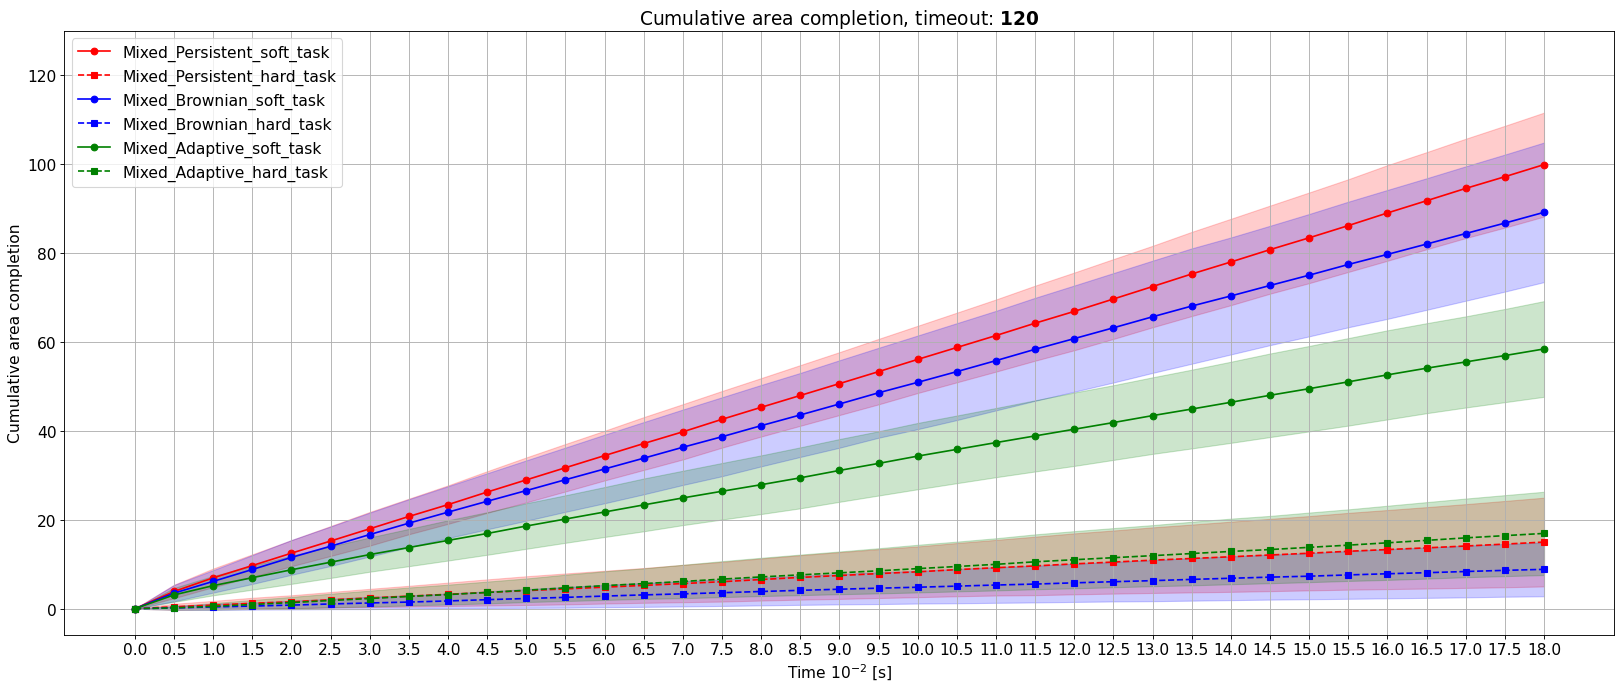

Saving figure:  cumulativeAreaCompletion_Regions_timeout#180.png


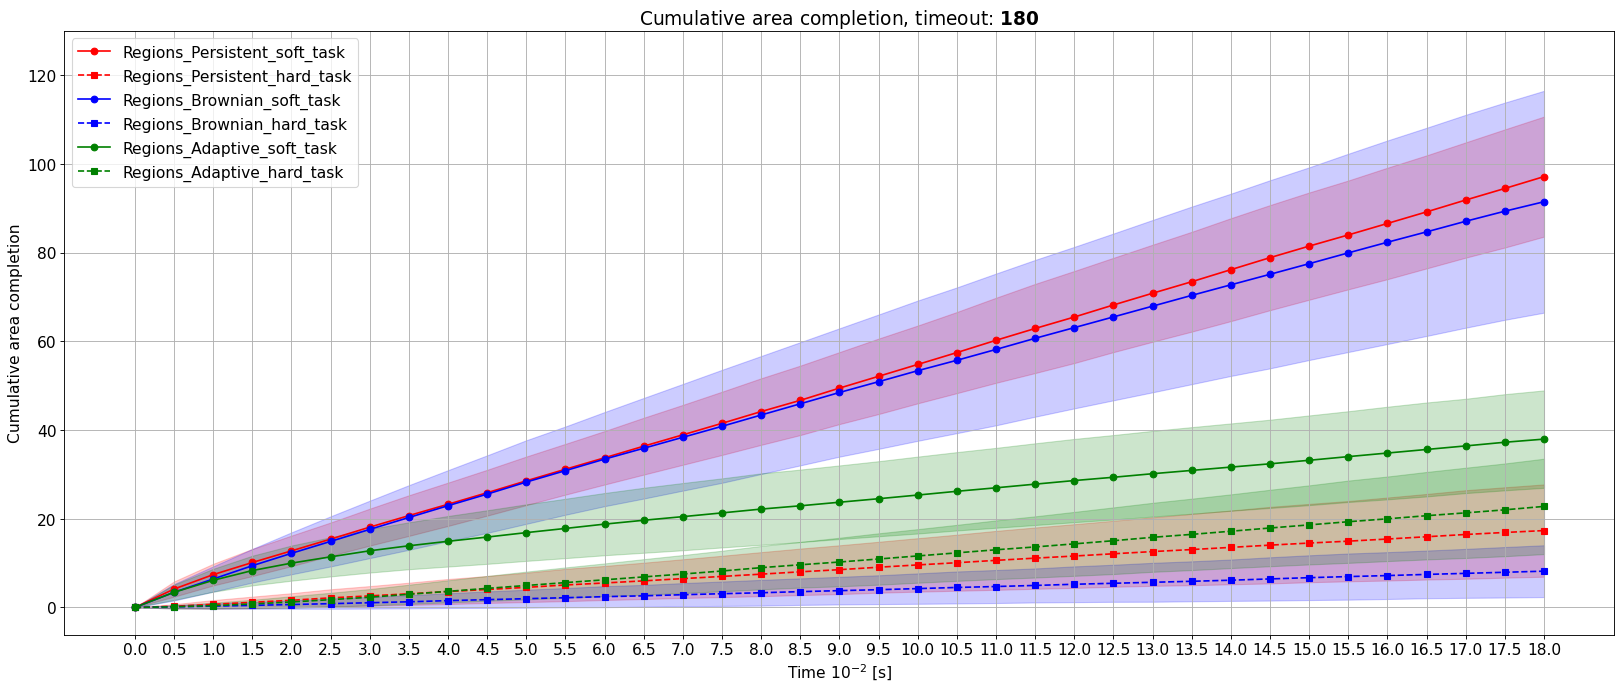

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#180.png


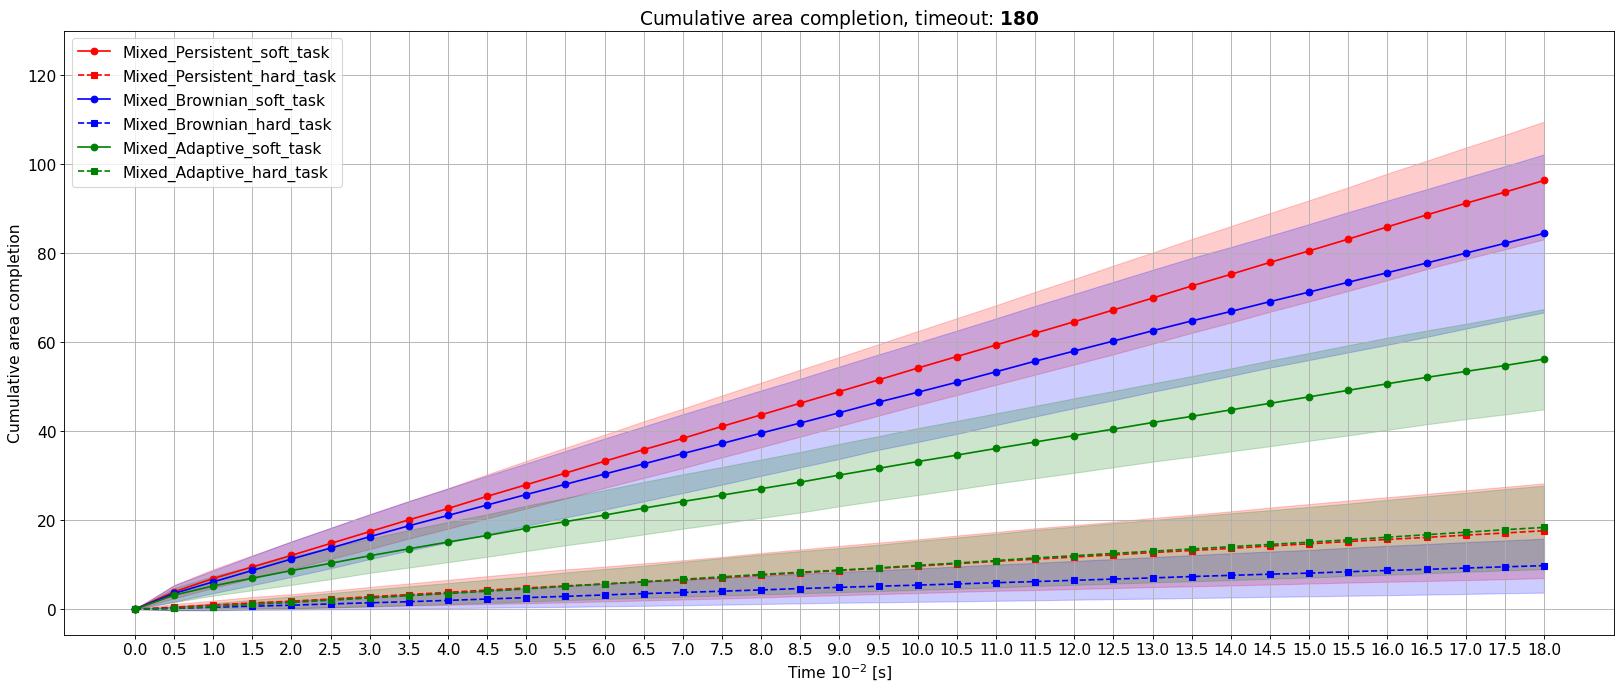

Saving figure:  cumulativeAreaCompletion_Regions_timeout#240.png


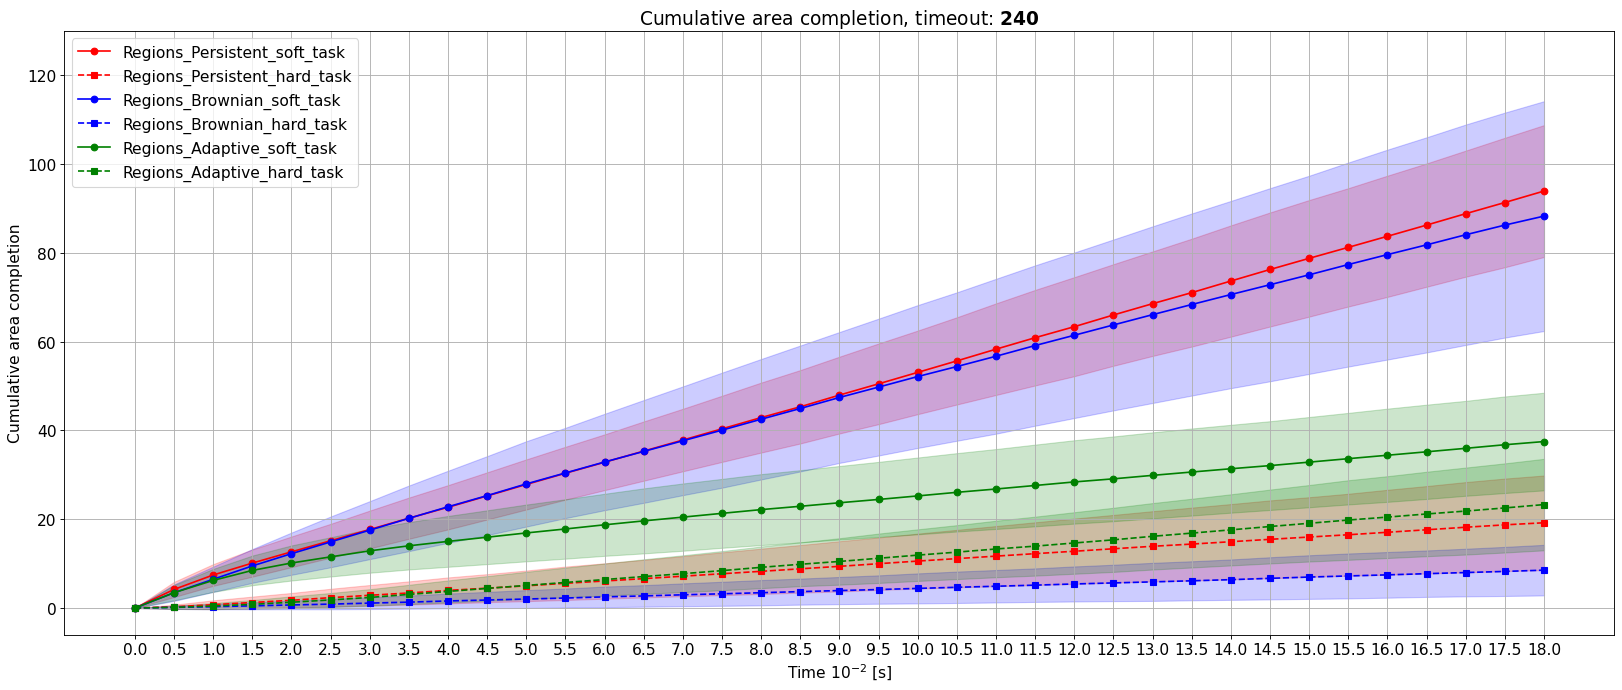

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#240.png


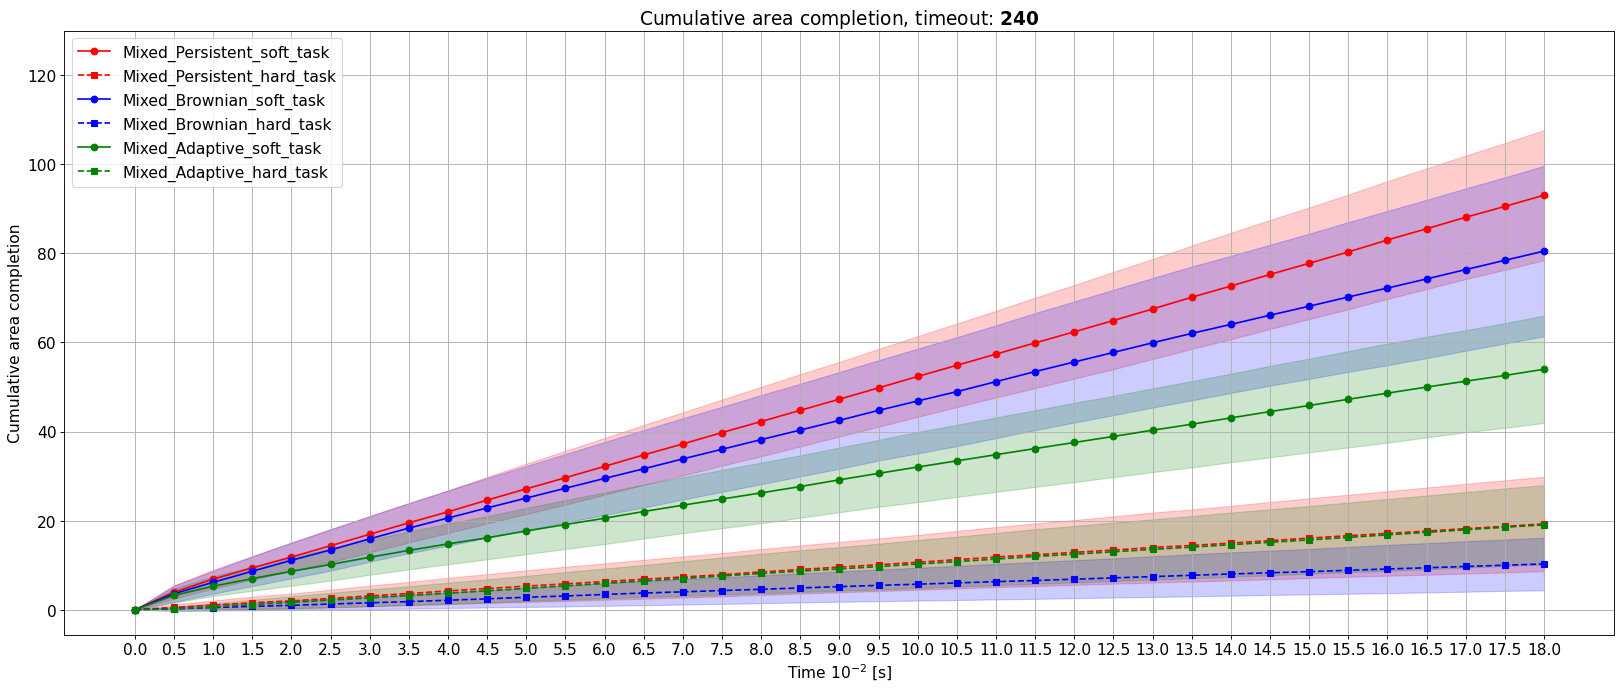

Saving figure:  cumulativeAreaCompletion_Regions_timeout#300.png


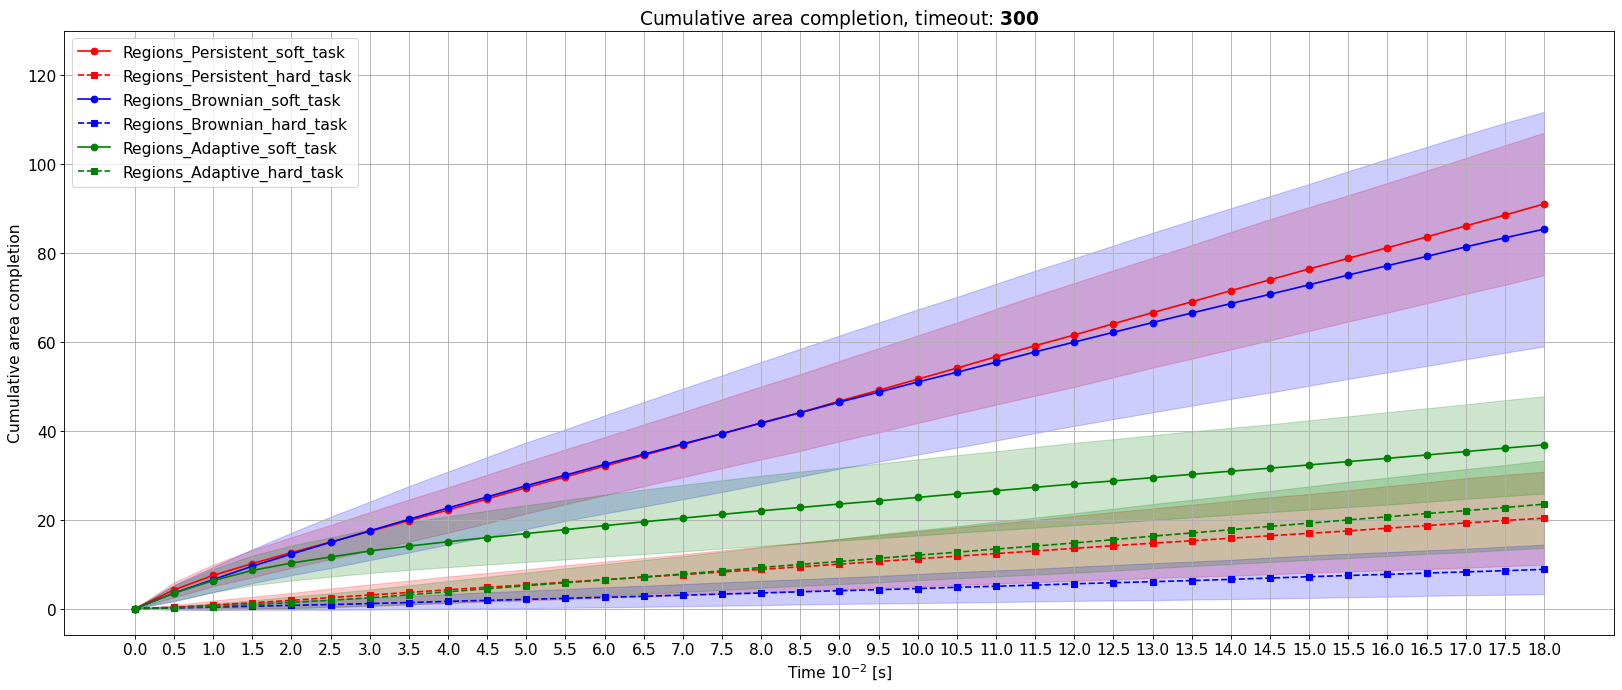

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#300.png


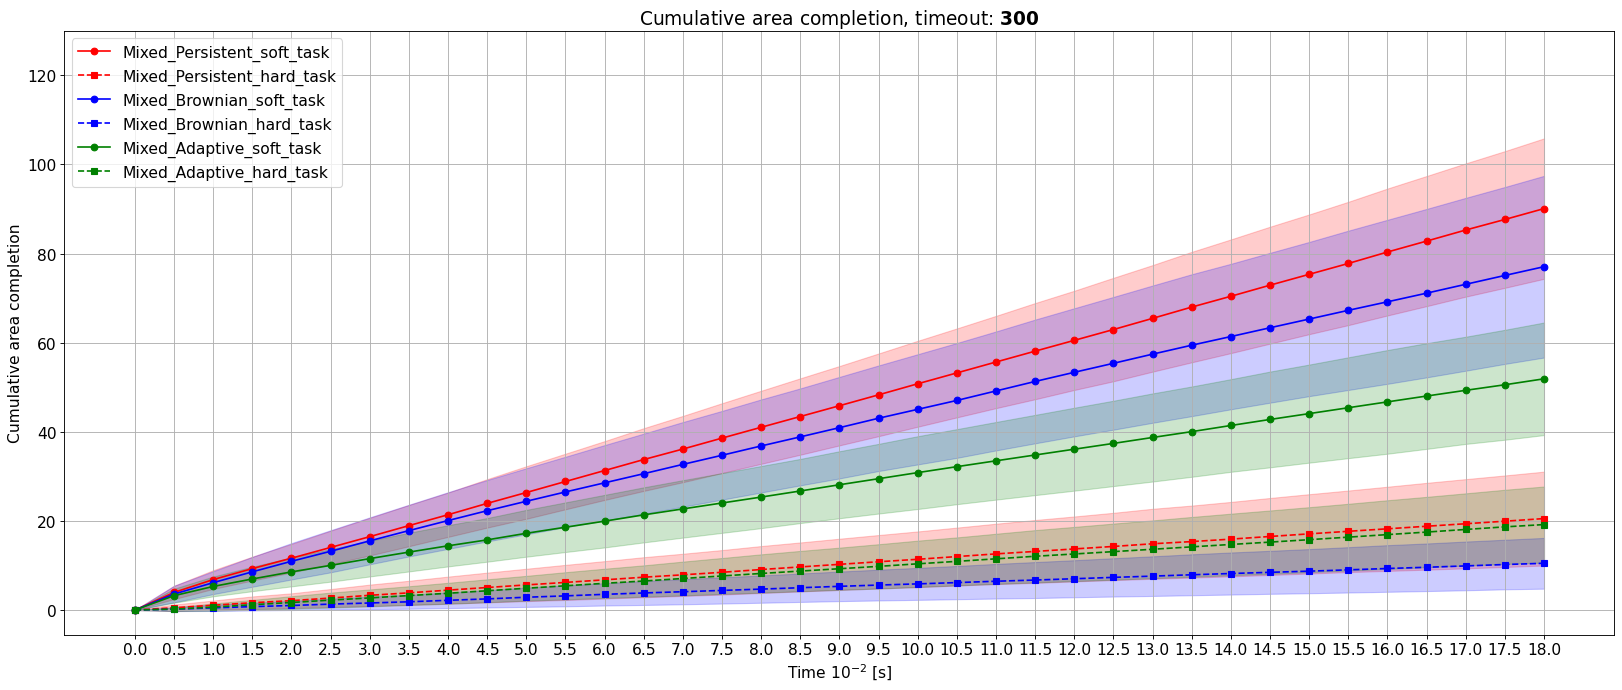

Saving figure:  cumulativeAreaCompletion_Regions_timeout#360.png


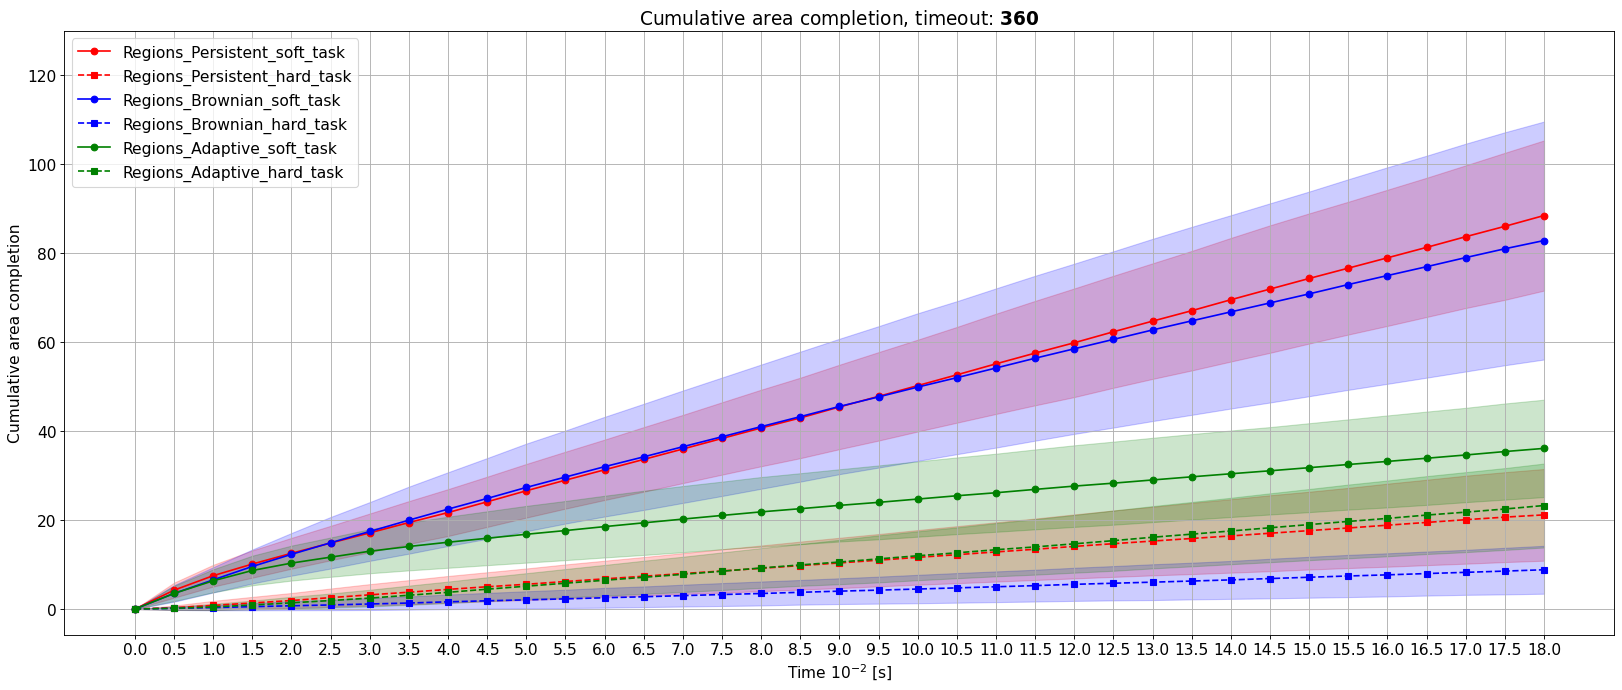

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#360.png


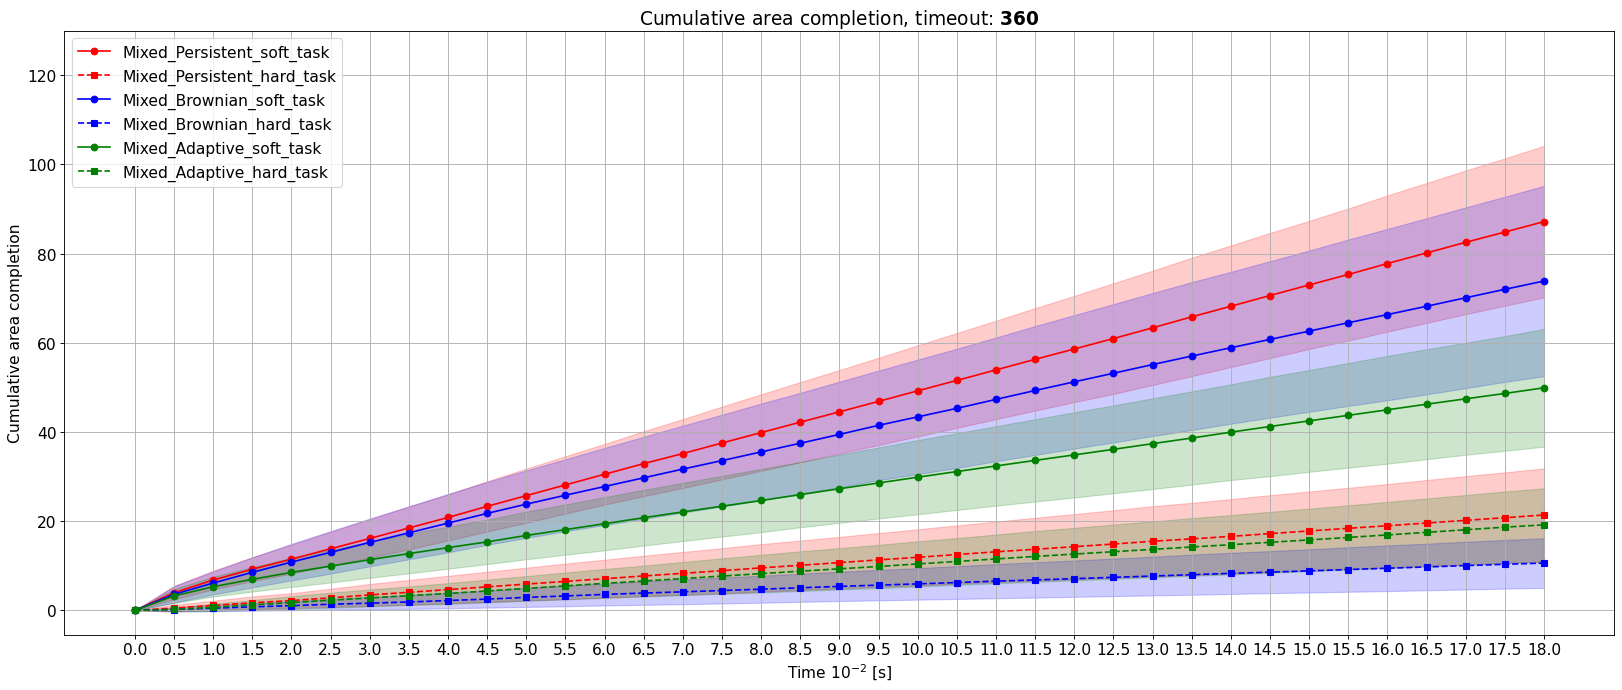

Saving figure:  cumulativeAreaCompletion_Regions_timeout#420.png


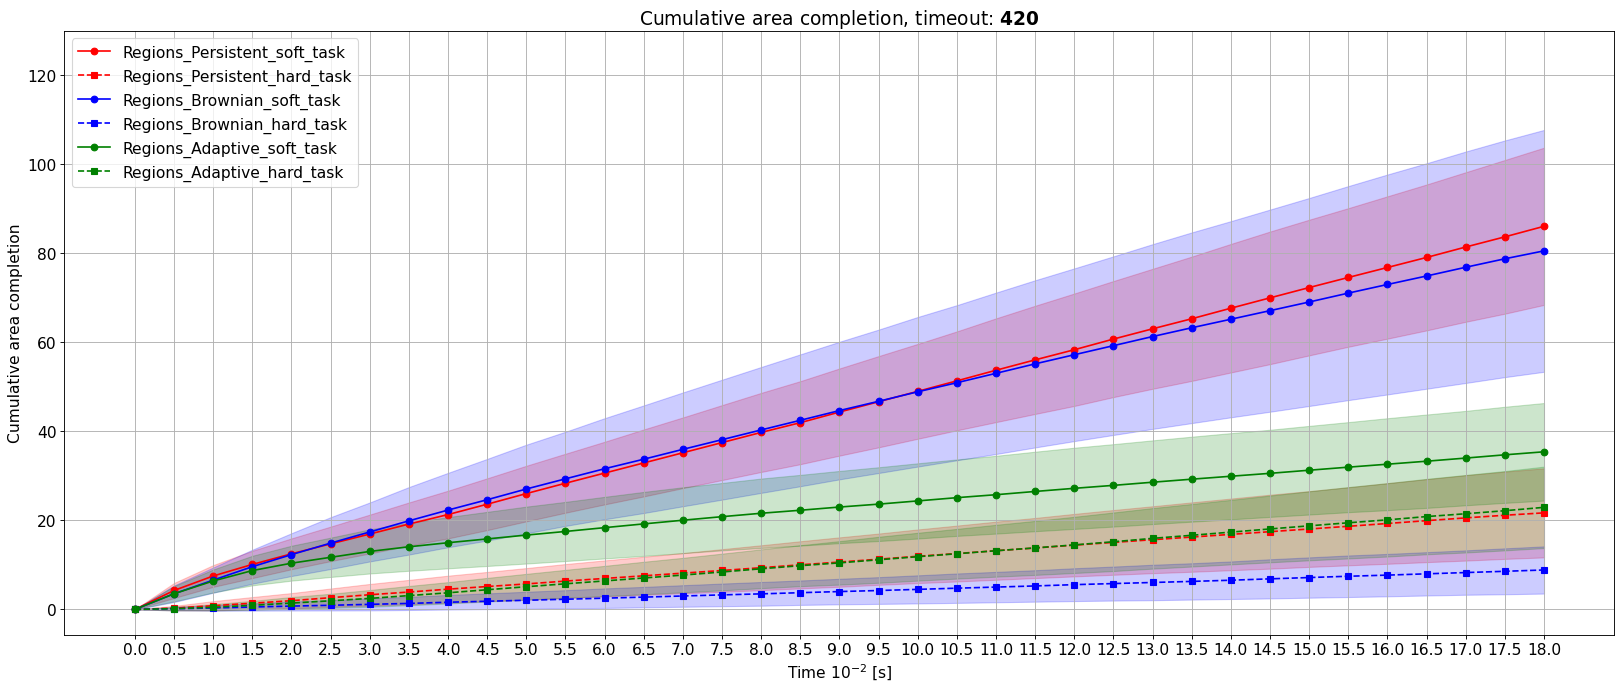

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#420.png


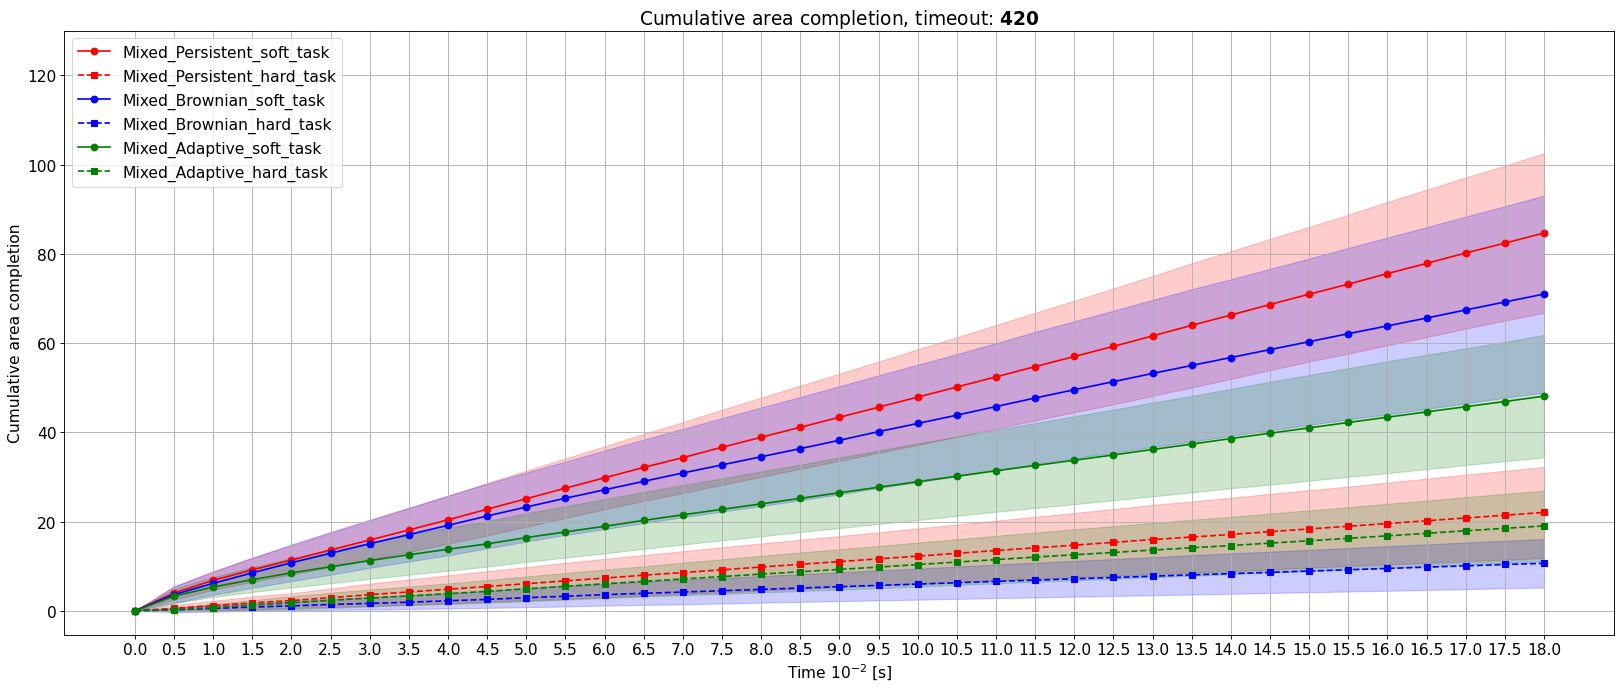

Saving figure:  cumulativeAreaCompletion_Regions_timeout#480.png


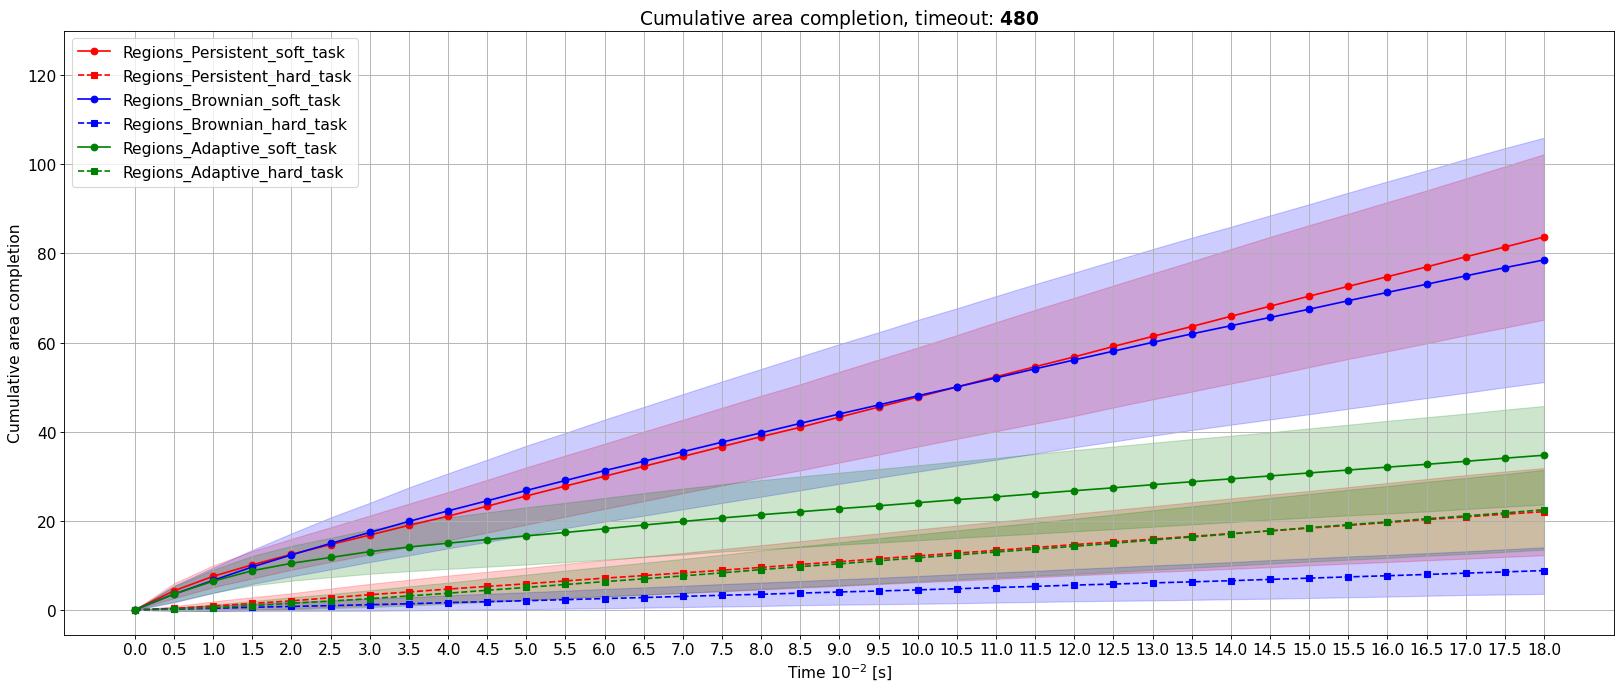

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#480.png


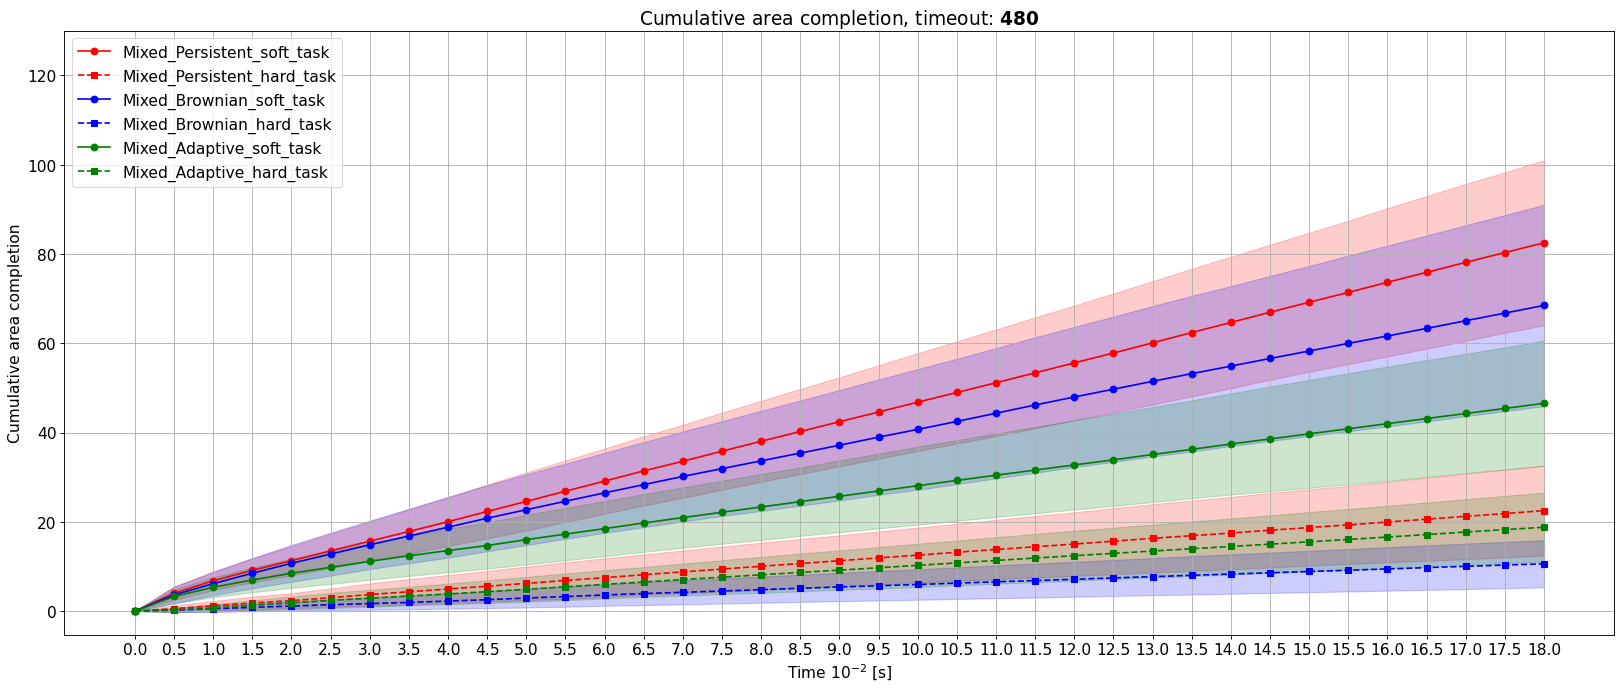

Saving figure:  cumulativeAreaCompletion_Regions_timeout#540.png


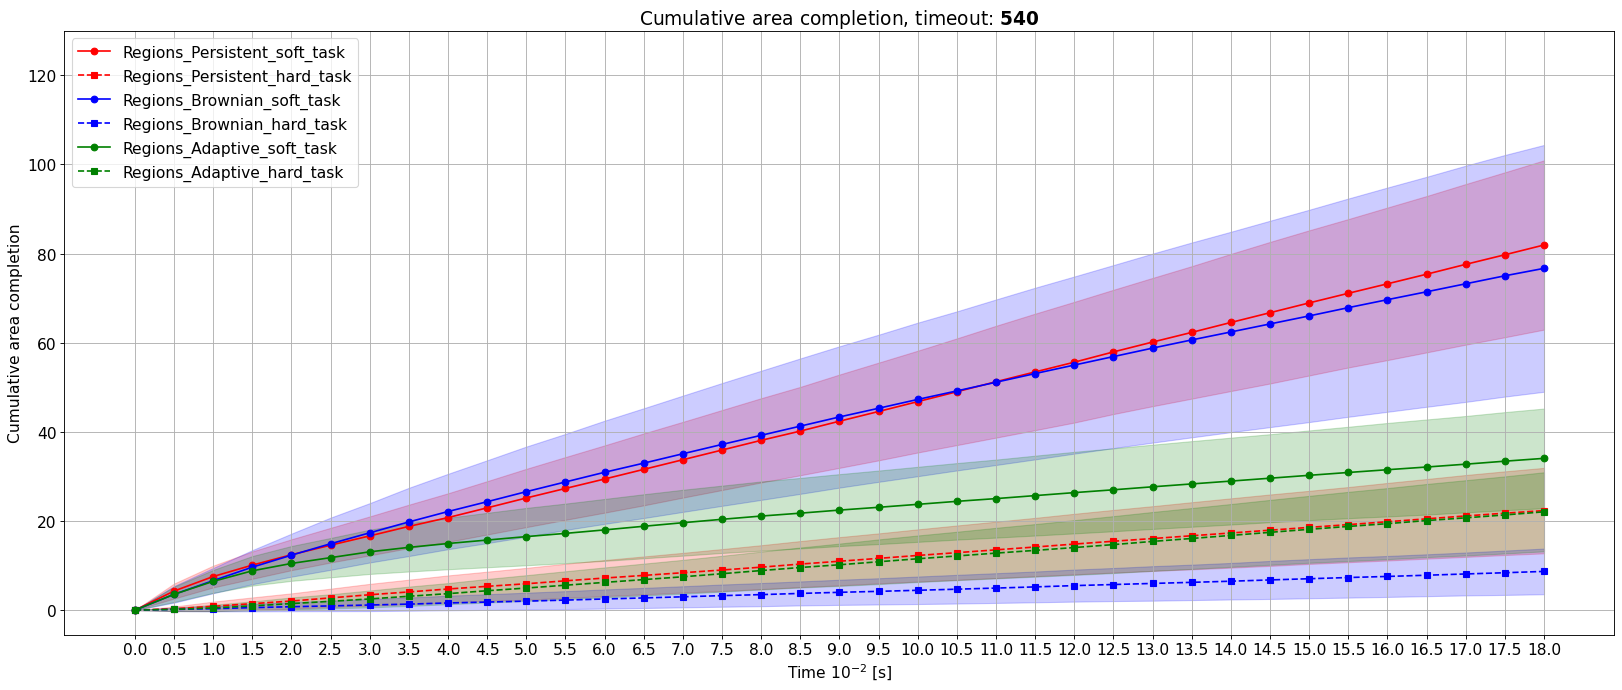

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#540.png


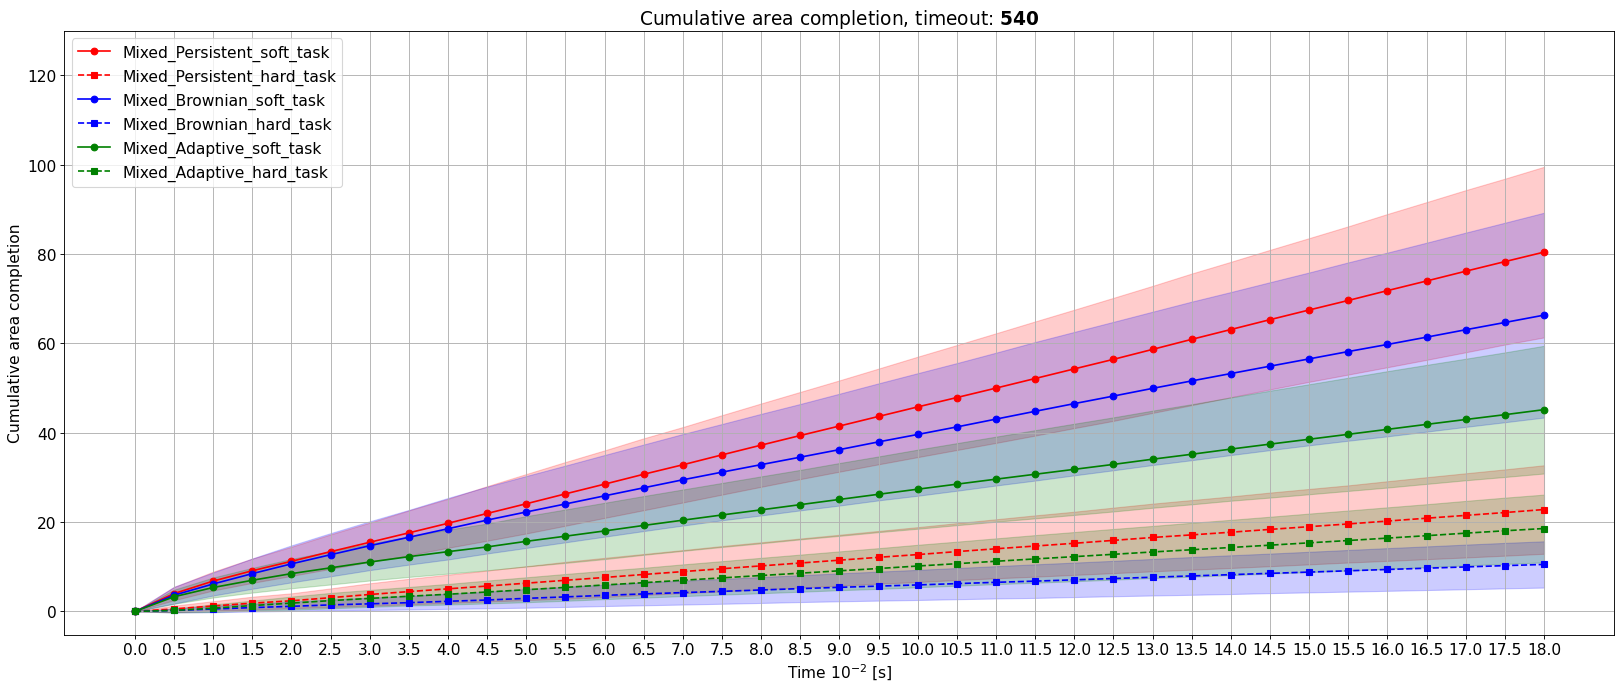

Saving figure:  cumulativeAreaCompletion_Regions_timeout#600.png


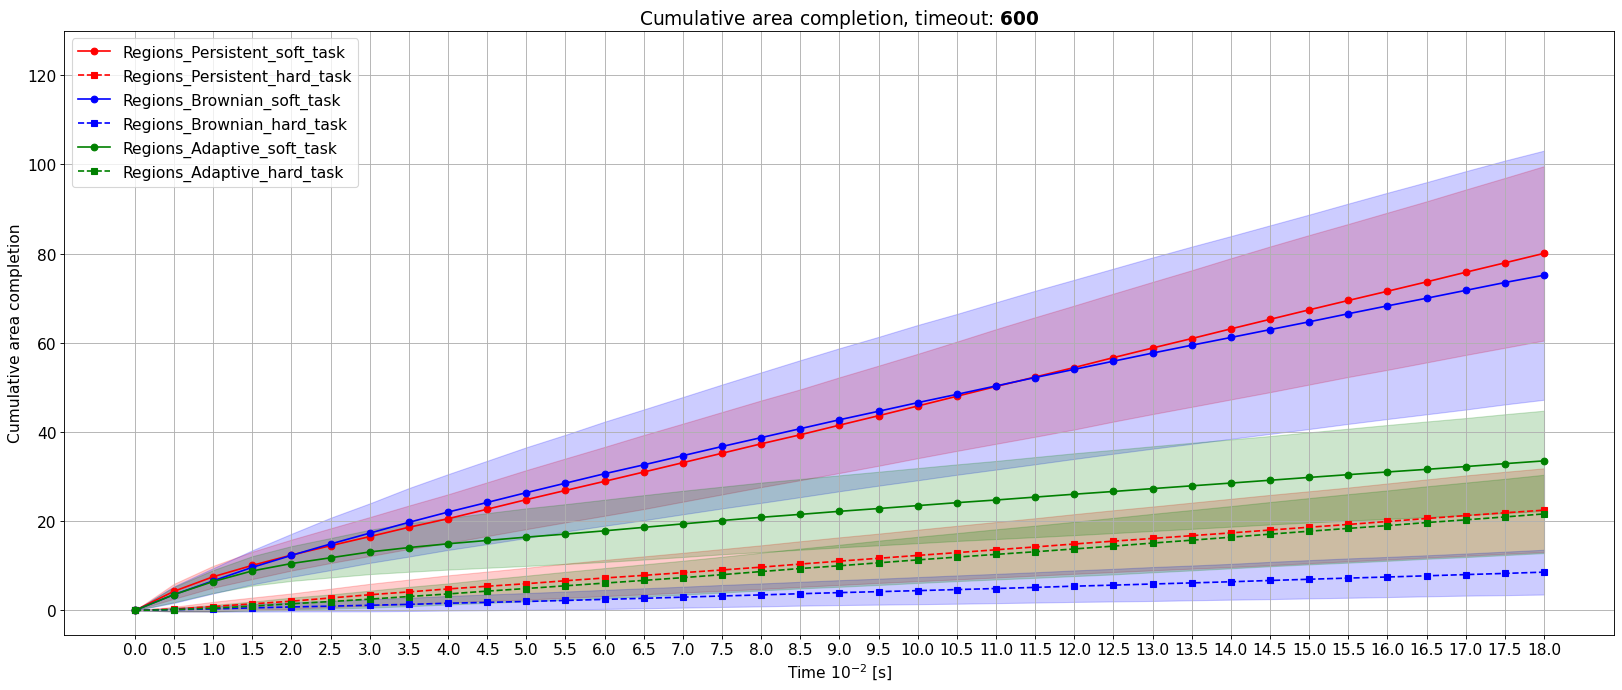

Saving figure:  cumulativeAreaCompletion_Mixed_timeout#600.png


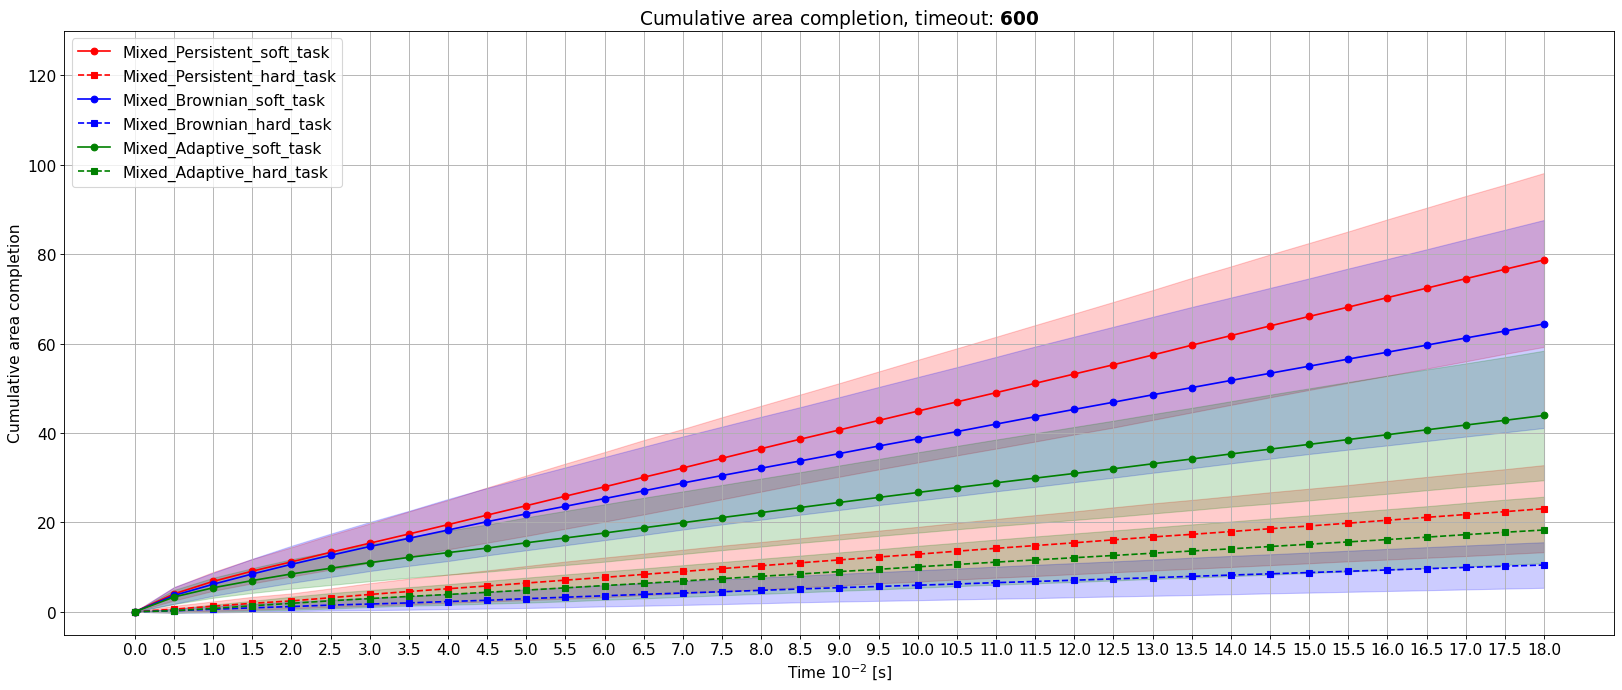

In [16]:
for timeout in ["10", "30", "60", "120", "180", "240", "300", "360", "420", "480", "540", "600"]:
    cumulative_plot(cumsums, bin_edges, timeout)

In [11]:
# fig, ax = plt.subplots(figsize=(20, 4))

# yb_est = np.append([0],np.mean(cumsum_blue, axis=0))
# yb_err = np.append([0],np.std(cumsum_blue, axis=0))

# yr_est = np.append([0],np.mean(cumsum_red, axis=0))
# yr_err = np.append([0],np.std(cumsum_red, axis=0))


# ax.plot(bin_edges, yb_est, 'bo', linewidth=1.5, label='red')
# ax.fill_between(bin_edges, yb_est - yb_err, yb_est + yb_err, alpha=0.2)

# ax.plot(bin_edges, yr_est, 'ro', linewidth=1.5, label='red')
# ax.fill_between(bin_edges, yr_est - yr_err, yr_est + yr_err, alpha=0.2)


# # tidy up the figure
# ax.set_xticks(bin_edges)
# ax.grid(True)
# ax.legend()#loc='right')
# ax.set_title('Cumulative area completion for timeout...')
# ax.set_xlabel('Time[s]')
# ax.set_ylabel('Cumulative blue area completion')
# plt.show()